# Data Analysis and Modeling of Pump Data

In [1]:
nr_examples_to_prepare = 2000
window_width_input_minutes = 60
window_width_output_minutes = 60*24

In [2]:
import pandas
fname = "sensor.csv"
df = pandas.read_csv( fname )

In [3]:
# The first column has no name. Give it a name!
df.rename(columns={ df.columns[0]: "Samplenr" }, inplace = True)

In [4]:
df.head()

,Samplenr,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
df.dtypes

Samplenr            int64
timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36   

In [6]:
df.describe()

,Samplenr,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [7]:
possible_machine_states = list(df.machine_status.unique())
possible_machine_states

['NORMAL', 'BROKEN', 'RECOVERING']

In [8]:
df_status_NORMAL = df[ df["machine_status"] == "NORMAL" ]


In [9]:
nr_rows_machine_status_NORMAL = df_status_NORMAL.shape[0]
nr_rows_machine_status_NORMAL

205836

In [10]:
nr_rows_total = df.shape[0]
nr_rows_total

220320

In [11]:
percent_machine_status_NORMAL = \
    (nr_rows_machine_status_NORMAL / nr_rows_total) * 100.0
percent_machine_status_NORMAL

93.42592592592592

In [12]:
df_status_BROKEN = df[ df["machine_status"] == "BROKEN" ]
df_status_BROKEN

,Samplenr,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
17155,17155,2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.6528,BROKEN
24510,24510,2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.7384,BROKEN
69318,69318,2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.5231,BROKEN
77790,77790,2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.3611,BROKEN
128040,128040,2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,NaN,BROKEN
141131,141131,2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.7685,BROKEN
166440,166440,2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,NaN,205.7292,BROKEN


In [13]:
nr_rows_machine_status_BROKEN = df_status_BROKEN.shape[0]
print("So {0} times, the pump was broken".format(nr_rows_machine_status_BROKEN))

So 7 times, the pump was broken


In [14]:
df_status_RECOVERING = df[ df["machine_status"] == "RECOVERING" ]
nr_rows_machine_status_RECOVERING = df_status_RECOVERING.shape[0]

In [15]:
percent_machine_status_RECOVERING = \
    (nr_rows_machine_status_RECOVERING / nr_rows_total) * 100.0
percent_machine_status_RECOVERING

6.570896877269426

In [16]:
import matplotlib.pyplot as plt

xpos = [1,2,3]
data = [nr_rows_machine_status_NORMAL,
        nr_rows_machine_status_BROKEN,
        nr_rows_machine_status_RECOVERING]

fig, ax = plt.subplots()
ax.bar(xpos,data)
ax.set_xticks(xpos)
ax.set_xticklabels(possible_machine_states)
ax.set_title("How often was the machine (pump) in each machine state?")
plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
df_status_BROKEN

,Samplenr,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
17155,17155,2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.6528,BROKEN
24510,24510,2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.7384,BROKEN
69318,69318,2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.5231,BROKEN
77790,77790,2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.3611,BROKEN
128040,128040,2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,NaN,BROKEN
141131,141131,2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.7685,BROKEN
166440,166440,2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,NaN,205.7292,BROKEN


In [18]:
row_numbers_machine_BROKEN = list(df_status_BROKEN["Samplenr"].values)
row_numbers_machine_BROKEN

[17155, 24510, 69318, 77790, 128040, 141131, 166440]

In [19]:
recovering_times_hours = []

for i in row_numbers_machine_BROKEN:
    print("\nMachine in status BROKEN in row: {0}".format(i) )
    
    go_further = True
    j = i
    while go_further:
        j += 1
        machine_status_in_row_j = df.iloc[j]["machine_status"]        
        if machine_status_in_row_j != "RECOVERING":
            go_further = False
            
    print("Machine went back to status {0} in row: {1}"
          .format(machine_status_in_row_j, j-i)
          )
    recovering_hours = (j-i)/60
    recovering_days  = recovering_hours / 24
    print("Machine was in RECOVERING state for {0:.1f} hours / {1:.1f} days"
          .format( recovering_hours, recovering_days )
         )
    
    recovering_times_hours.append(recovering_hours)


Machine in status BROKEN in row: 17155
Machine went back to status NORMAL in row: 945
Machine was in RECOVERING state for 15.8 hours / 0.7 days

Machine in status BROKEN in row: 24510
Machine went back to status NORMAL in row: 3111
Machine was in RECOVERING state for 51.9 hours / 2.2 days

Machine in status BROKEN in row: 69318
Machine went back to status NORMAL in row: 1313
Machine was in RECOVERING state for 21.9 hours / 0.9 days

Machine in status BROKEN in row: 77790
Machine went back to status NORMAL in row: 606
Machine was in RECOVERING state for 10.1 hours / 0.4 days

Machine in status BROKEN in row: 128040
Machine went back to status NORMAL in row: 8391
Machine was in RECOVERING state for 139.8 hours / 5.8 days

Machine in status BROKEN in row: 141131
Machine went back to status NORMAL in row: 42
Machine was in RECOVERING state for 0.7 hours / 0.0 days

Machine in status BROKEN in row: 166440
Machine went back to status NORMAL in row: 76
Machine was in RECOVERING state for 1.3

In [20]:
recovering_times_hours

[15.75, 51.85, 21.883333333333333, 10.1, 139.85, 0.7, 1.2666666666666666]

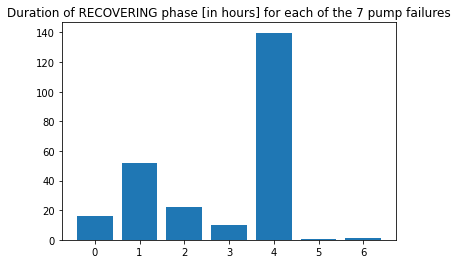

In [21]:
import matplotlib.pyplot as plt
import numpy as np

xpos = np.arange( len(recovering_times_hours) )

fig, ax = plt.subplots()
ax.bar(xpos,recovering_times_hours)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos)
ax.set_title("Duration of RECOVERING phase [in hours] for each of the 7 pump failures")
plt.show()

In [22]:
min(recovering_times_hours), max(recovering_times_hours)

(0.7, 139.85)

In [23]:
sensor_values = list( df["sensor_17"] )

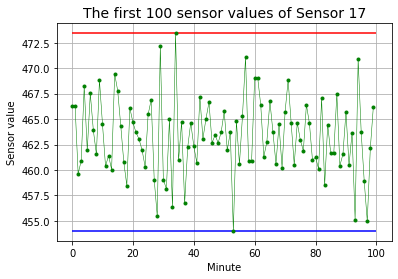

In [24]:
import matplotlib.pyplot as plt

some_few_values = sensor_values[:100]
min_val = min(some_few_values)
max_val = max(some_few_values)

plt.plot( some_few_values, color="green", linestyle="-",
          marker=".", linewidth=0.5 )
plt.hlines(min_val, 0,100, color="blue")
plt.hlines(max_val, 0,100, color="red")
plt.xlabel("Minute", fontsize=10)
plt.ylabel("Sensor value", fontsize=10)
plt.title("The first 100 sensor values of Sensor 17", fontsize=14)
plt.grid()
#plt.savefig("sensor_17.png")
plt.show()

In [25]:
#missing values
df.isna().sum()

Samplenr               0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


In [26]:
only_numerical_cols = df.iloc[:,2:54]
only_numerical_cols

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856


In [27]:
fill_value = -1.0
data_with_gaps_filled = df.fillna( fill_value )
data_with_gaps_filled.isna().sum()

Samplenr          0
timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0


In [28]:
#training and testing
sensordata_cols_only = data_with_gaps_filled.iloc[:,2:54]

In [29]:
#scaling
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler with feature range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_sensor_data = scaler.fit_transform(sensordata_cols_only)

In [30]:
window_width_input_minutes = 60
window_width_output_minutes = 60*24

In [31]:
start_minute = 0
a_single_input_window = scaled_sensor_data[start_minute:start_minute+window_width_input_minutes]

In [32]:
# <a_single_input_window> contains the data for 60 minutes
# for each of the 52 sensors
a_single_input_window.shape

(60, 52)

In [33]:
# Map window to a vector, since we need a 1D input for the MLP
a_single_input_vector = a_single_input_window.flatten()
a_single_input_vector.shape

(3120,)

Check whether pump failed in that timeframe

In [34]:
def check_for_pump_failure(start, stop):
    """
    Returns 1, if the pump failed in time window
    (start,stop)
    
    Returns 0, else.
    """
    for minute in range(start,stop):
        # get the corresponding row from the data
        machine_state_in_this_minute = df["machine_status"].iloc[minute]
        if machine_state_in_this_minute in ["BROKEN", "RECOVERING"]:
            return 1
    
    return 0

In [35]:
check_for_pump_failure(0,17000)

0

In [36]:
check_for_pump_failure(17000,17200)

1

# Prepare example data

In [37]:
 #Max row nr such that input window and output window
# still fit into the time series data?
max_row_nr = nr_rows_total-window_width_input_minutes-window_width_output_minutes

# collect the desired number of (input_vec,output_vec) examples
training_pairs = []
for example_nr in range(0,nr_examples_to_prepare):
    
    # show progress
    if example_nr % 100 == 0:
        print("Collected examples so far:", example_nr)
    
    # 1. guess a random minute
    found_example_where_pump_worked_in_input_window = False
    while not found_example_where_pump_worked_in_input_window:
    
        rnd_minute = np.random.randint(0,max_row_nr)
        
        # Make sure, the input window does not cover
        # already a phase where the machine is broken:
        # We want examples where the input window covers
        # a normal state and we want to predict whether
        # the pump will fail or not in the next time window
        # We do NOT want to collect examples where the machine is
        # already BROKEN in the input window
        # (could be too easy to predict whether the machine
        #  will be broken in the future as well)
        start = rnd_minute
        stop  = start+window_width_input_minutes
        if check_for_pump_failure(start,stop)==0:
            found_example_where_pump_worked_in_input_window = True
            
    
    # 2. get the input vector from the 2D sensor matrix data
    a_single_input_window = scaled_sensor_data[rnd_minute:rnd_minute+window_width_input_minutes]
    a_single_input_vector = a_single_input_window.flatten()
    
    # 3. check whether in time range
    #    (rnd_minute+window_width_input_minutes,
    #     rnd_minute+window_width_input_minutes+window_width_output_minutes)
    #    the pump failed
    start = rnd_minute+window_width_input_minutes
    stop  = rnd_minute+window_width_input_minutes+window_width_output_minutes
    output_value = check_for_pump_failure(start,stop)
    
    # 4. add a new training pair to list of training pairs
    training_pairs.append( (a_single_input_vector, output_value) )
    
    

Collected examples so far: 0
Collected examples so far: 100
Collected examples so far: 200
Collected examples so far: 300
Collected examples so far: 400
Collected examples so far: 500
Collected examples so far: 600
Collected examples so far: 700
Collected examples so far: 800
Collected examples so far: 900
Collected examples so far: 1000
Collected examples so far: 1100
Collected examples so far: 1200
Collected examples so far: 1300
Collected examples so far: 1400
Collected examples so far: 1500
Collected examples so far: 1600
Collected examples so far: 1700
Collected examples so far: 1800
Collected examples so far: 1900


# Prepare a large sample matrix D

In [38]:
input_vec_len = training_pairs[0][0].shape[0]
output_vec_len = 1


D = np.zeros( (nr_examples_to_prepare, input_vec_len+output_vec_len))
print("Shape of D is", D.shape)

# Fill data matrix D with input vec + output vec in each row
for nr in range(0,nr_examples_to_prepare):
    (x,y) = training_pairs[nr]
    D[nr,0:input_vec_len] = x
    D[nr,input_vec_len]   = y

Shape of D is (2000, 3121)


In [39]:
nr_train_samples = int(nr_examples_to_prepare/2)
x_train = D[0:nr_train_samples, 0:input_vec_len]
y_train = D[0:nr_train_samples, input_vec_len]

In [40]:
x_train.shape

(1000, 3120)

In [41]:
y_train.shape

(1000,)

In [42]:
x_test = D[nr_train_samples:, 0:input_vec_len]
y_test = D[nr_train_samples:, input_vec_len]

# Build MLP

In [43]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [44]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(input_vec_len,)) )
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.build()

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               624200    
_________________________________________________________________
dense_1 (Dense)              (None, 40)                8040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 632,281
Trainable params: 632,281
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train, y_train, epochs=3000)

Train on 1000 samples
Epoch 1/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.1962 - accuracy: 0.8290
Epoch 2/3000
1000/1000 [==============================] - 0s 250us/sample - loss: 0.0459 - accuracy: 0.9570
Epoch 3/3000
1000/1000 [==============================] - 0s 249us/sample - loss: 0.0505 - accuracy: 0.9570
Epoch 4/3000
1000/1000 [==============================] - 0s 236us/sample - loss: 0.0455 - accuracy: 0.9570
Epoch 5/3000
1000/1000 [==============================] - 0s 242us/sample - loss: 0.0478 - accuracy: 0.9570
Epoch 6/3000
1000/1000 [==============================] - 0s 247us/sample - loss: 0.0419 - accuracy: 0.9570
Epoch 7/3000
1000/1000 [==============================] - 0s 240us/sample - loss: 0.0414 - accuracy: 0.9570
Epoch 8/3000
1000/1000 [==============================] - 0s 249us/sample - loss: 0.0518 - accuracy: 0.9570
Epoch 9/3000
1000/1000 [==============================] - 0s 253us/sample - loss: 0.0469 - accuracy: 0.9570
Epoch 10

1000/1000 [==============================] - 0s 249us/sample - loss: 0.0353 - accuracy: 0.9580
Epoch 76/3000
1000/1000 [==============================] - 0s 257us/sample - loss: 0.0342 - accuracy: 0.9590
Epoch 77/3000
1000/1000 [==============================] - 0s 251us/sample - loss: 0.0371 - accuracy: 0.9580
Epoch 78/3000
1000/1000 [==============================] - 0s 302us/sample - loss: 0.0368 - accuracy: 0.9580
Epoch 79/3000
1000/1000 [==============================] - 0s 254us/sample - loss: 0.0351 - accuracy: 0.9580
Epoch 80/3000
1000/1000 [==============================] - 0s 257us/sample - loss: 0.0362 - accuracy: 0.9580
Epoch 81/3000
1000/1000 [==============================] - 0s 250us/sample - loss: 0.0364 - accuracy: 0.9580
Epoch 82/3000
1000/1000 [==============================] - 0s 250us/sample - loss: 0.0364 - accuracy: 0.9590
Epoch 83/3000
1000/1000 [==============================] - 0s 251us/sample - loss: 0.0349 - accuracy: 0.9580
Epoch 84/3000
1000/1000 [========

1000/1000 [==============================] - 0s 316us/sample - loss: 0.0365 - accuracy: 0.9590
Epoch 149/3000
1000/1000 [==============================] - 0s 301us/sample - loss: 0.0364 - accuracy: 0.9600 - loss: 0.0366 - accuracy: 
Epoch 150/3000
1000/1000 [==============================] - 0s 300us/sample - loss: 0.0345 - accuracy: 0.9590
Epoch 151/3000
1000/1000 [==============================] - 0s 313us/sample - loss: 0.0360 - accuracy: 0.9580
Epoch 152/3000
1000/1000 [==============================] - 0s 309us/sample - loss: 0.0367 - accuracy: 0.9590
Epoch 153/3000
1000/1000 [==============================] - 0s 312us/sample - loss: 0.0379 - accuracy: 0.9600
Epoch 154/3000
1000/1000 [==============================] - 0s 297us/sample - loss: 0.0342 - accuracy: 0.9600
Epoch 155/3000
1000/1000 [==============================] - 0s 295us/sample - loss: 0.0338 - accuracy: 0.9600
Epoch 156/3000
1000/1000 [==============================] - 0s 304us/sample - loss: 0.0334 - accuracy: 0.96

1000/1000 [==============================] - 0s 303us/sample - loss: 0.0336 - accuracy: 0.9600
Epoch 222/3000
1000/1000 [==============================] - 0s 310us/sample - loss: 0.0332 - accuracy: 0.9600
Epoch 223/3000
1000/1000 [==============================] - 0s 305us/sample - loss: 0.0316 - accuracy: 0.9600
Epoch 224/3000
1000/1000 [==============================] - 0s 296us/sample - loss: 0.0329 - accuracy: 0.9600
Epoch 225/3000
1000/1000 [==============================] - 0s 298us/sample - loss: 0.0351 - accuracy: 0.9600
Epoch 226/3000
1000/1000 [==============================] - 0s 303us/sample - loss: 0.0368 - accuracy: 0.9600
Epoch 227/3000
1000/1000 [==============================] - 0s 304us/sample - loss: 0.0325 - accuracy: 0.9600
Epoch 228/3000
1000/1000 [==============================] - 0s 299us/sample - loss: 0.0336 - accuracy: 0.9600
Epoch 229/3000
1000/1000 [==============================] - 0s 300us/sample - loss: 0.0320 - accuracy: 0.9600
Epoch 230/3000
1000/1000 

1000/1000 [==============================] - 0s 295us/sample - loss: 0.0278 - accuracy: 0.9690
Epoch 295/3000
1000/1000 [==============================] - 0s 304us/sample - loss: 0.0282 - accuracy: 0.9680
Epoch 296/3000
1000/1000 [==============================] - 0s 309us/sample - loss: 0.0270 - accuracy: 0.9720
Epoch 297/3000
1000/1000 [==============================] - 0s 297us/sample - loss: 0.0295 - accuracy: 0.9690
Epoch 298/3000
1000/1000 [==============================] - 0s 270us/sample - loss: 0.0273 - accuracy: 0.9720
Epoch 299/3000
1000/1000 [==============================] - 0s 293us/sample - loss: 0.0263 - accuracy: 0.9720
Epoch 300/3000
1000/1000 [==============================] - 0s 305us/sample - loss: 0.0324 - accuracy: 0.9590
Epoch 301/3000
1000/1000 [==============================] - 0s 301us/sample - loss: 0.0397 - accuracy: 0.9570
Epoch 302/3000
1000/1000 [==============================] - 0s 298us/sample - loss: 0.0392 - accuracy: 0.9570
Epoch 303/3000
1000/1000 

1000/1000 [==============================] - 0s 302us/sample - loss: 0.0355 - accuracy: 0.9590
Epoch 368/3000
1000/1000 [==============================] - 0s 309us/sample - loss: 0.0262 - accuracy: 0.9720
Epoch 369/3000
1000/1000 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.96 - 0s 298us/sample - loss: 0.0292 - accuracy: 0.9680
Epoch 370/3000
1000/1000 [==============================] - 0s 305us/sample - loss: 0.0250 - accuracy: 0.9710
Epoch 371/3000
1000/1000 [==============================] - 0s 300us/sample - loss: 0.0265 - accuracy: 0.9700
Epoch 372/3000
1000/1000 [==============================] - 0s 293us/sample - loss: 0.0312 - accuracy: 0.9670
Epoch 373/3000
1000/1000 [==============================] - 0s 309us/sample - loss: 0.0411 - accuracy: 0.9570
Epoch 374/3000
1000/1000 [==============================] - 0s 306us/sample - loss: 0.0383 - accuracy: 0.9570
Epoch 375/3000
1000/1000 [==============================] - 0s 292us/sample - loss: 0.0295 - 

1000/1000 [==============================] - 0s 301us/sample - loss: 0.0260 - accuracy: 0.9720
Epoch 441/3000
1000/1000 [==============================] - 0s 299us/sample - loss: 0.0296 - accuracy: 0.9690
Epoch 442/3000
1000/1000 [==============================] - 0s 323us/sample - loss: 0.0257 - accuracy: 0.9730
Epoch 443/3000
1000/1000 [==============================] - 0s 308us/sample - loss: 0.0288 - accuracy: 0.9660
Epoch 444/3000
1000/1000 [==============================] - 0s 298us/sample - loss: 0.0254 - accuracy: 0.9730
Epoch 445/3000
1000/1000 [==============================] - 0s 298us/sample - loss: 0.0436 - accuracy: 0.9570
Epoch 446/3000
1000/1000 [==============================] - 0s 295us/sample - loss: 0.0408 - accuracy: 0.9570
Epoch 447/3000
1000/1000 [==============================] - 0s 300us/sample - loss: 0.0399 - accuracy: 0.9570
Epoch 448/3000
1000/1000 [==============================] - 0s 316us/sample - loss: 0.0398 - accuracy: 0.9570
Epoch 449/3000
1000/1000 

1000/1000 [==============================] - 0s 296us/sample - loss: 0.0345 - accuracy: 0.9610
Epoch 515/3000
1000/1000 [==============================] - 0s 297us/sample - loss: 0.0305 - accuracy: 0.9670
Epoch 516/3000
1000/1000 [==============================] - 0s 310us/sample - loss: 0.0268 - accuracy: 0.9710
Epoch 517/3000
1000/1000 [==============================] - 0s 311us/sample - loss: 0.0258 - accuracy: 0.9720
Epoch 518/3000
1000/1000 [==============================] - 0s 302us/sample - loss: 0.0244 - accuracy: 0.9720
Epoch 519/3000
1000/1000 [==============================] - 0s 303us/sample - loss: 0.0237 - accuracy: 0.9730
Epoch 520/3000
1000/1000 [==============================] - 0s 298us/sample - loss: 0.0236 - accuracy: 0.9760
Epoch 521/3000
1000/1000 [==============================] - 0s 300us/sample - loss: 0.0233 - accuracy: 0.9740
Epoch 522/3000
1000/1000 [==============================] - 0s 298us/sample - loss: 0.0245 - accuracy: 0.9750
Epoch 523/3000
1000/1000 

1000/1000 [==============================] - 0s 327us/sample - loss: 0.0252 - accuracy: 0.9720
Epoch 587/3000
1000/1000 [==============================] - 0s 371us/sample - loss: 0.0259 - accuracy: 0.9730
Epoch 588/3000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0243 - accuracy: 0.9740
Epoch 589/3000
1000/1000 [==============================] - 0s 468us/sample - loss: 0.0232 - accuracy: 0.9750
Epoch 590/3000
1000/1000 [==============================] - 0s 395us/sample - loss: 0.0229 - accuracy: 0.9730
Epoch 591/3000
1000/1000 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.97 - 0s 358us/sample - loss: 0.0265 - accuracy: 0.9700
Epoch 592/3000
1000/1000 [==============================] - 0s 362us/sample - loss: 0.0282 - accuracy: 0.9690
Epoch 593/3000
1000/1000 [==============================] - 0s 375us/sample - loss: 0.0240 - accuracy: 0.9720
Epoch 594/3000
1000/1000 [==============================] - 0s 391us/sample - loss: 0.0289 - 

1000/1000 [==============================] - 0s 347us/sample - loss: 0.0220 - accuracy: 0.9750
Epoch 660/3000
1000/1000 [==============================] - 0s 370us/sample - loss: 0.0211 - accuracy: 0.9760
Epoch 661/3000
1000/1000 [==============================] - 0s 384us/sample - loss: 0.0238 - accuracy: 0.9730
Epoch 662/3000
1000/1000 [==============================] - 0s 293us/sample - loss: 0.0234 - accuracy: 0.9740
Epoch 663/3000
1000/1000 [==============================] - 0s 360us/sample - loss: 0.0218 - accuracy: 0.9760
Epoch 664/3000
1000/1000 [==============================] - 0s 388us/sample - loss: 0.0387 - accuracy: 0.9590
Epoch 665/3000
1000/1000 [==============================] - 0s 326us/sample - loss: 0.0399 - accuracy: 0.9570
Epoch 666/3000
1000/1000 [==============================] - 0s 346us/sample - loss: 0.0394 - accuracy: 0.9570
Epoch 667/3000
1000/1000 [==============================] - 0s 399us/sample - loss: 0.0393 - accuracy: 0.9570
Epoch 668/3000
1000/1000 

1000/1000 [==============================] - 0s 392us/sample - loss: 0.0230 - accuracy: 0.9760
Epoch 734/3000
1000/1000 [==============================] - 0s 364us/sample - loss: 0.0231 - accuracy: 0.9730
Epoch 735/3000
1000/1000 [==============================] - 0s 331us/sample - loss: 0.0207 - accuracy: 0.9760
Epoch 736/3000
1000/1000 [==============================] - 0s 346us/sample - loss: 0.0259 - accuracy: 0.9730
Epoch 737/3000
1000/1000 [==============================] - 0s 364us/sample - loss: 0.0411 - accuracy: 0.9570
Epoch 738/3000
1000/1000 [==============================] - 0s 360us/sample - loss: 0.0386 - accuracy: 0.9570
Epoch 739/3000
1000/1000 [==============================] - 0s 344us/sample - loss: 0.0378 - accuracy: 0.9580
Epoch 740/3000
1000/1000 [==============================] - 0s 342us/sample - loss: 0.0303 - accuracy: 0.9660
Epoch 741/3000
1000/1000 [==============================] - 0s 333us/sample - loss: 0.0213 - accuracy: 0.9750
Epoch 742/3000
1000/1000 

Epoch 806/3000
1000/1000 [==============================] - 0s 419us/sample - loss: 0.0186 - accuracy: 0.9800
Epoch 807/3000
1000/1000 [==============================] - 0s 363us/sample - loss: 0.0194 - accuracy: 0.9800
Epoch 808/3000
1000/1000 [==============================] - 0s 404us/sample - loss: 0.0251 - accuracy: 0.9690
Epoch 809/3000
1000/1000 [==============================] - 0s 408us/sample - loss: 0.0216 - accuracy: 0.9780
Epoch 810/3000
1000/1000 [==============================] - 0s 466us/sample - loss: 0.0191 - accuracy: 0.9800
Epoch 811/3000
1000/1000 [==============================] - 0s 378us/sample - loss: 0.0218 - accuracy: 0.9740
Epoch 812/3000
1000/1000 [==============================] - 0s 351us/sample - loss: 0.0310 - accuracy: 0.9650
Epoch 813/3000
1000/1000 [==============================] - 0s 342us/sample - loss: 0.0200 - accuracy: 0.9780
Epoch 814/3000
1000/1000 [==============================] - 0s 358us/sample - loss: 0.0217 - accuracy: 0.9750
Epoch 815/

1000/1000 [==============================] - 0s 370us/sample - loss: 0.0329 - accuracy: 0.9630
Epoch 881/3000
1000/1000 [==============================] - 0s 321us/sample - loss: 0.0275 - accuracy: 0.9680
Epoch 882/3000
1000/1000 [==============================] - 0s 358us/sample - loss: 0.0214 - accuracy: 0.9760
Epoch 883/3000
1000/1000 [==============================] - 0s 344us/sample - loss: 0.0223 - accuracy: 0.9740
Epoch 884/3000
1000/1000 [==============================] - 0s 338us/sample - loss: 0.0193 - accuracy: 0.9790
Epoch 885/3000
1000/1000 [==============================] - 0s 329us/sample - loss: 0.0188 - accuracy: 0.9790
Epoch 886/3000
1000/1000 [==============================] - 0s 360us/sample - loss: 0.0193 - accuracy: 0.9800
Epoch 887/3000
1000/1000 [==============================] - 0s 328us/sample - loss: 0.0316 - accuracy: 0.9640
Epoch 888/3000
1000/1000 [==============================] - 0s 330us/sample - loss: 0.0389 - accuracy: 0.9580
Epoch 889/3000
1000/1000 

1000/1000 [==============================] - 0s 385us/sample - loss: 0.0304 - accuracy: 0.9650
Epoch 954/3000
1000/1000 [==============================] - 0s 390us/sample - loss: 0.0271 - accuracy: 0.9700
Epoch 955/3000
1000/1000 [==============================] - 0s 333us/sample - loss: 0.0180 - accuracy: 0.9810
Epoch 956/3000
1000/1000 [==============================] - 0s 321us/sample - loss: 0.0178 - accuracy: 0.9790
Epoch 957/3000
1000/1000 [==============================] - 0s 323us/sample - loss: 0.0187 - accuracy: 0.9790
Epoch 958/3000
1000/1000 [==============================] - 0s 329us/sample - loss: 0.0186 - accuracy: 0.9790
Epoch 959/3000
1000/1000 [==============================] - 0s 389us/sample - loss: 0.0208 - accuracy: 0.9770
Epoch 960/3000
1000/1000 [==============================] - 0s 367us/sample - loss: 0.0211 - accuracy: 0.9740
Epoch 961/3000
1000/1000 [==============================] - 0s 385us/sample - loss: 0.0224 - accuracy: 0.9730
Epoch 962/3000
1000/1000 

1000/1000 [==============================] - 0s 318us/sample - loss: 0.0172 - accuracy: 0.9800
Epoch 1028/3000
1000/1000 [==============================] - 0s 329us/sample - loss: 0.0224 - accuracy: 0.9750
Epoch 1029/3000
1000/1000 [==============================] - 0s 334us/sample - loss: 0.0236 - accuracy: 0.9700
Epoch 1030/3000
1000/1000 [==============================] - 0s 320us/sample - loss: 0.0375 - accuracy: 0.9600
Epoch 1031/3000
1000/1000 [==============================] - 0s 319us/sample - loss: 0.0394 - accuracy: 0.9580
Epoch 1032/3000
1000/1000 [==============================] - 0s 410us/sample - loss: 0.0390 - accuracy: 0.9580
Epoch 1033/3000
1000/1000 [==============================] - 0s 327us/sample - loss: 0.0383 - accuracy: 0.9580
Epoch 1034/3000
1000/1000 [==============================] - 0s 322us/sample - loss: 0.0273 - accuracy: 0.9700
Epoch 1035/3000
1000/1000 [==============================] - 0s 325us/sample - loss: 0.0232 - accuracy: 0.9710
Epoch 1036/3000
1

1000/1000 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.97 - 0s 411us/sample - loss: 0.0217 - accuracy: 0.9730
Epoch 1101/3000
1000/1000 [==============================] - 0s 318us/sample - loss: 0.0208 - accuracy: 0.9750
Epoch 1102/3000
1000/1000 [==============================] - 0s 318us/sample - loss: 0.0192 - accuracy: 0.9780
Epoch 1103/3000
1000/1000 [==============================] - 0s 324us/sample - loss: 0.0176 - accuracy: 0.9770
Epoch 1104/3000
1000/1000 [==============================] - 0s 338us/sample - loss: 0.0201 - accuracy: 0.9760 - loss: 0.0208 - accuracy: 
Epoch 1105/3000
1000/1000 [==============================] - 0s 357us/sample - loss: 0.0405 - accuracy: 0.9580
Epoch 1106/3000
1000/1000 [==============================] - 0s 342us/sample - loss: 0.0390 - accuracy: 0.9580
Epoch 1107/3000
1000/1000 [==============================] - 0s 332us/sample - loss: 0.0387 - accuracy: 0.9580
Epoch 1108/3000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 336us/sample - loss: 0.0201 - accuracy: 0.9790
Epoch 1174/3000
1000/1000 [==============================] - 0s 316us/sample - loss: 0.0178 - accuracy: 0.9800
Epoch 1175/3000
1000/1000 [==============================] - 0s 340us/sample - loss: 0.0221 - accuracy: 0.9750
Epoch 1176/3000
1000/1000 [==============================] - 0s 345us/sample - loss: 0.0221 - accuracy: 0.9750
Epoch 1177/3000
1000/1000 [==============================] - 0s 310us/sample - loss: 0.0246 - accuracy: 0.9720
Epoch 1178/3000
1000/1000 [==============================] - 0s 322us/sample - loss: 0.0285 - accuracy: 0.9660
Epoch 1179/3000
1000/1000 [==============================] - 0s 402us/sample - loss: 0.0312 - accuracy: 0.9650
Epoch 1180/3000
1000/1000 [==============================] - 0s 360us/sample - loss: 0.0196 - accuracy: 0.9770
Epoch 1181/3000
1000/1000 [==============================] - 0s 323us/sample - loss: 0.0203 - accuracy: 0.9740
Epoch 1182/3000
1

1000/1000 [==============================] - 0s 321us/sample - loss: 0.0167 - accuracy: 0.9800
Epoch 1247/3000
1000/1000 [==============================] - 0s 333us/sample - loss: 0.0152 - accuracy: 0.9840
Epoch 1248/3000
1000/1000 [==============================] - 0s 330us/sample - loss: 0.0417 - accuracy: 0.9560
Epoch 1249/3000
1000/1000 [==============================] - 0s 327us/sample - loss: 0.0394 - accuracy: 0.9580
Epoch 1250/3000
1000/1000 [==============================] - 0s 322us/sample - loss: 0.0390 - accuracy: 0.9580
Epoch 1251/3000
1000/1000 [==============================] - 0s 355us/sample - loss: 0.0389 - accuracy: 0.9580
Epoch 1252/3000
1000/1000 [==============================] - 0s 370us/sample - loss: 0.0387 - accuracy: 0.9580
Epoch 1253/3000
1000/1000 [==============================] - 0s 376us/sample - loss: 0.0385 - accuracy: 0.9580
Epoch 1254/3000
1000/1000 [==============================] - 0s 352us/sample - loss: 0.0382 - accuracy: 0.9580
Epoch 1255/3000
1

1000/1000 [==============================] - 0s 360us/sample - loss: 0.0192 - accuracy: 0.97500s - loss: 0.0134 - accuracy
Epoch 1320/3000
1000/1000 [==============================] - 0s 369us/sample - loss: 0.0189 - accuracy: 0.9760
Epoch 1321/3000
1000/1000 [==============================] - 0s 337us/sample - loss: 0.0135 - accuracy: 0.9870
Epoch 1322/3000
1000/1000 [==============================] - 0s 332us/sample - loss: 0.0195 - accuracy: 0.9770
Epoch 1323/3000
1000/1000 [==============================] - 0s 379us/sample - loss: 0.0218 - accuracy: 0.9700
Epoch 1324/3000
1000/1000 [==============================] - 0s 366us/sample - loss: 0.0149 - accuracy: 0.9840
Epoch 1325/3000
1000/1000 [==============================] - 0s 334us/sample - loss: 0.0216 - accuracy: 0.9710
Epoch 1326/3000
1000/1000 [==============================] - 0s 354us/sample - loss: 0.0161 - accuracy: 0.9810
Epoch 1327/3000
1000/1000 [==============================] - 0s 343us/sample - loss: 0.0169 - accura

1000/1000 [==============================] - 0s 380us/sample - loss: 0.0166 - accuracy: 0.9820
Epoch 1392/3000
1000/1000 [==============================] - 0s 336us/sample - loss: 0.0247 - accuracy: 0.9690
Epoch 1393/3000
1000/1000 [==============================] - 0s 341us/sample - loss: 0.0259 - accuracy: 0.9700 - loss: 0.0253 - accuracy
Epoch 1394/3000
1000/1000 [==============================] - 0s 330us/sample - loss: 0.0174 - accuracy: 0.9790
Epoch 1395/3000
1000/1000 [==============================] - 0s 313us/sample - loss: 0.0143 - accuracy: 0.9860
Epoch 1396/3000
1000/1000 [==============================] - 0s 335us/sample - loss: 0.0174 - accuracy: 0.9770
Epoch 1397/3000
1000/1000 [==============================] - 0s 326us/sample - loss: 0.0217 - accuracy: 0.9780
Epoch 1398/3000
1000/1000 [==============================] - 0s 310us/sample - loss: 0.0144 - accuracy: 0.9860
Epoch 1399/3000
1000/1000 [==============================] - 0s 408us/sample - loss: 0.0152 - accuracy

1000/1000 [==============================] - 0s 378us/sample - loss: 0.0124 - accuracy: 0.9870
Epoch 1464/3000
1000/1000 [==============================] - 0s 356us/sample - loss: 0.0248 - accuracy: 0.9700
Epoch 1465/3000
1000/1000 [==============================] - 0s 333us/sample - loss: 0.0113 - accuracy: 0.9870
Epoch 1466/3000
1000/1000 [==============================] - 0s 413us/sample - loss: 0.0120 - accuracy: 0.9850
Epoch 1467/3000
1000/1000 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.97 - 0s 365us/sample - loss: 0.0199 - accuracy: 0.9780
Epoch 1468/3000
1000/1000 [==============================] - 0s 370us/sample - loss: 0.0287 - accuracy: 0.9710
Epoch 1469/3000
1000/1000 [==============================] - 0s 351us/sample - loss: 0.0393 - accuracy: 0.9590
Epoch 1470/3000
1000/1000 [==============================] - 0s 338us/sample - loss: 0.0398 - accuracy: 0.9580
Epoch 1471/3000
1000/1000 [==============================] - 0s 347us/sample - loss: 0

Epoch 1535/3000
1000/1000 [==============================] - 0s 435us/sample - loss: 0.0136 - accuracy: 0.9850
Epoch 1536/3000
1000/1000 [==============================] - 0s 422us/sample - loss: 0.0158 - accuracy: 0.9810
Epoch 1537/3000
1000/1000 [==============================] - 0s 357us/sample - loss: 0.0241 - accuracy: 0.9720
Epoch 1538/3000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0190 - accuracy: 0.9790
Epoch 1539/3000
1000/1000 [==============================] - 0s 365us/sample - loss: 0.0129 - accuracy: 0.9870
Epoch 1540/3000
1000/1000 [==============================] - 0s 391us/sample - loss: 0.0284 - accuracy: 0.9700
Epoch 1541/3000
1000/1000 [==============================] - 1s 577us/sample - loss: 0.0189 - accuracy: 0.9780
Epoch 1542/3000
1000/1000 [==============================] - 0s 477us/sample - loss: 0.0185 - accuracy: 0.9790
Epoch 1543/3000
1000/1000 [==============================] - 1s 521us/sample - loss: 0.0119 - accuracy: 0.9880 -

1000/1000 [==============================] - 0s 321us/sample - loss: 0.0149 - accuracy: 0.9850
Epoch 1608/3000
1000/1000 [==============================] - 0s 315us/sample - loss: 0.0236 - accuracy: 0.9730
Epoch 1609/3000
1000/1000 [==============================] - 0s 374us/sample - loss: 0.0244 - accuracy: 0.9720
Epoch 1610/3000
1000/1000 [==============================] - 0s 314us/sample - loss: 0.0171 - accuracy: 0.9800
Epoch 1611/3000
1000/1000 [==============================] - 0s 293us/sample - loss: 0.0227 - accuracy: 0.9720
Epoch 1612/3000
1000/1000 [==============================] - 0s 315us/sample - loss: 0.0383 - accuracy: 0.9580
Epoch 1613/3000
1000/1000 [==============================] - 1s 642us/sample - loss: 0.0211 - accuracy: 0.9800
Epoch 1614/3000
1000/1000 [==============================] - 1s 590us/sample - loss: 0.0189 - accuracy: 0.9810
Epoch 1615/3000
1000/1000 [==============================] - 0s 486us/sample - loss: 0.0191 - accuracy: 0.9800
Epoch 1616/3000
1

1000/1000 [==============================] - 0s 390us/sample - loss: 0.0100 - accuracy: 0.9870
Epoch 1679/3000
1000/1000 [==============================] - 0s 319us/sample - loss: 0.0096 - accuracy: 0.9900
Epoch 1680/3000
1000/1000 [==============================] - 0s 375us/sample - loss: 0.0125 - accuracy: 0.9840
Epoch 1681/3000
1000/1000 [==============================] - 0s 378us/sample - loss: 0.0222 - accuracy: 0.9730
Epoch 1682/3000
1000/1000 [==============================] - 0s 331us/sample - loss: 0.0098 - accuracy: 0.9910
Epoch 1683/3000
1000/1000 [==============================] - 0s 311us/sample - loss: 0.0100 - accuracy: 0.9910
Epoch 1684/3000
1000/1000 [==============================] - 0s 390us/sample - loss: 0.0116 - accuracy: 0.9870
Epoch 1685/3000
1000/1000 [==============================] - 1s 553us/sample - loss: 0.0262 - accuracy: 0.9720
Epoch 1686/3000
1000/1000 [==============================] - 1s 569us/sample - loss: 0.0233 - accuracy: 0.9720
Epoch 1687/3000
1

1000/1000 [==============================] - 1s 778us/sample - loss: 0.0187 - accuracy: 0.9740 - loss: 0.0184 - accuracy: 
Epoch 1748/3000
1000/1000 [==============================] - 1s 803us/sample - loss: 0.0107 - accuracy: 0.9870 - loss: 0.0148 - accura - ETA: 0s - loss: 0.0115 - accuracy: 0.
Epoch 1749/3000
1000/1000 [==============================] - 1s 553us/sample - loss: 0.0084 - accuracy: 0.9920
Epoch 1750/3000
1000/1000 [==============================] - 1s 525us/sample - loss: 0.0155 - accuracy: 0.9820
Epoch 1751/3000
1000/1000 [==============================] - 0s 403us/sample - loss: 0.0166 - accuracy: 0.9800
Epoch 1752/3000
1000/1000 [==============================] - 1s 603us/sample - loss: 0.0087 - accuracy: 0.9910
Epoch 1753/3000
1000/1000 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.98 - 0s 385us/sample - loss: 0.0126 - accuracy: 0.9860
Epoch 1754/3000
1000/1000 [==============================] - 0s 355us/sample - loss: 0.0101 - accuracy: 0

1000/1000 [==============================] - 1s 655us/sample - loss: 0.0251 - accuracy: 0.9710 - loss: 0.0366 - accura
Epoch 1818/3000
1000/1000 [==============================] - 0s 486us/sample - loss: 0.0323 - accuracy: 0.9640
Epoch 1819/3000
1000/1000 [==============================] - 1s 505us/sample - loss: 0.0376 - accuracy: 0.9580 - loss: 0.0370 - accuracy: 0.95
Epoch 1820/3000
1000/1000 [==============================] - 0s 378us/sample - loss: 0.0370 - accuracy: 0.9580
Epoch 1821/3000
1000/1000 [==============================] - 0s 450us/sample - loss: 0.0300 - accuracy: 0.9650 - loss: 0.0414 - accura
Epoch 1822/3000
1000/1000 [==============================] - 0s 498us/sample - loss: 0.0140 - accuracy: 0.9870
Epoch 1823/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0102 - accuracy: 0.99100s - loss: 0.0108 - accuracy
Epoch 1824/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0123 - accuracy: 0.98700s - los
Epoch 1825/3000


1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0099 - accuracy: 0.98900s - loss: 0.0049  - ETA: 0s - loss: 0.0101 - accuracy
Epoch 1884/3000
1000/1000 [==============================] - 1s 891us/sample - loss: 0.0203 - accuracy: 0.9720
Epoch 1885/3000
1000/1000 [==============================] - 1s 987us/sample - loss: 0.0100 - accuracy: 0.9890 - loss: 0.0114 - accuracy - ETA: 0s - loss: 0.0121 - accuracy: 0. - ETA: 0s - loss: 0.0134 - accuracy: 0.98 - ETA: 0s - loss: 0.0128 - accuracy: 0. - ETA: 0s - loss: 0.0115 - accuracy: 
Epoch 1886/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0127 - accuracy: 0.98500s - loss: 0.0174 - ac - ETA: 0s - loss: 0.0134 - accuracy: 0. - ETA: 0s - loss: 0.0115 - accu - ETA: 0s - loss: 0.0110 - accuracy: 0.
Epoch 1887/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0137 - accuracy: 0.98500s - loss: 0.0087 - accuracy:  - ETA: 0s - loss: 0.0161 - accura
Epoch 1888/3000
1000/1000 [==

1000/1000 [==============================] - 0s 415us/sample - loss: 0.0365 - accuracy: 0.9580
Epoch 1944/3000
1000/1000 [==============================] - 0s 476us/sample - loss: 0.0361 - accuracy: 0.9580
Epoch 1945/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0280 - accuracy: 0.96900s - loss: 0.0381 - accuracy - ETA: 0s - loss: 0.0365 - accuracy: 0. - ETA: 0s - loss: 0.0
Epoch 1946/3000
1000/1000 [==============================] - 1s 988us/sample - loss: 0.0245 - accuracy: 0.9700
Epoch 1947/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0138 - accuracy: 0.98600s - loss: 0.012
Epoch 1948/3000
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0205 - accuracy: 0.98001s - loss: 0.0111 - accuracy: 0. - ETA: 0s - loss: 0.0074 - ac - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0080 - accura - ETA: 0s - loss: 0.0123 - accuracy: 
Epoch 1949/3000
1000/1000 [==============================] - 1s 1ms/sample

1000/1000 [==============================] - 0s 332us/sample - loss: 0.0107 - accuracy: 0.9880
Epoch 2009/3000
1000/1000 [==============================] - 0s 324us/sample - loss: 0.0088 - accuracy: 0.9890
Epoch 2010/3000
1000/1000 [==============================] - 0s 364us/sample - loss: 0.0076 - accuracy: 0.9920
Epoch 2011/3000
1000/1000 [==============================] - 0s 364us/sample - loss: 0.0074 - accuracy: 0.9920
Epoch 2012/3000
1000/1000 [==============================] - 0s 343us/sample - loss: 0.0192 - accuracy: 0.9790
Epoch 2013/3000
1000/1000 [==============================] - 0s 370us/sample - loss: 0.0087 - accuracy: 0.9900
Epoch 2014/3000
1000/1000 [==============================] - 0s 333us/sample - loss: 0.0151 - accuracy: 0.9830
Epoch 2015/3000
1000/1000 [==============================] - 0s 339us/sample - loss: 0.0073 - accuracy: 0.9930
Epoch 2016/3000
1000/1000 [==============================] - 0s 374us/sample - loss: 0.0088 - accuracy: 0.9920
Epoch 2017/3000
1

1000/1000 [==============================] - 0s 332us/sample - loss: 0.0137 - accuracy: 0.9850
Epoch 2082/3000
1000/1000 [==============================] - 0s 349us/sample - loss: 0.0129 - accuracy: 0.9860
Epoch 2083/3000
1000/1000 [==============================] - 0s 319us/sample - loss: 0.0159 - accuracy: 0.9810
Epoch 2084/3000
1000/1000 [==============================] - 0s 318us/sample - loss: 0.0386 - accuracy: 0.9590
Epoch 2085/3000
1000/1000 [==============================] - 0s 322us/sample - loss: 0.0387 - accuracy: 0.9580
Epoch 2086/3000
1000/1000 [==============================] - 0s 362us/sample - loss: 0.0383 - accuracy: 0.9580
Epoch 2087/3000
1000/1000 [==============================] - 0s 337us/sample - loss: 0.0379 - accuracy: 0.9580
Epoch 2088/3000
1000/1000 [==============================] - 0s 355us/sample - loss: 0.0357 - accuracy: 0.9590
Epoch 2089/3000
1000/1000 [==============================] - 0s 368us/sample - loss: 0.0134 - accuracy: 0.9870
Epoch 2090/3000
1

1000/1000 [==============================] - 0s 330us/sample - loss: 0.0364 - accuracy: 0.9600
Epoch 2155/3000
1000/1000 [==============================] - 0s 343us/sample - loss: 0.0287 - accuracy: 0.9660
Epoch 2156/3000
1000/1000 [==============================] - 0s 382us/sample - loss: 0.0200 - accuracy: 0.9760
Epoch 2157/3000
1000/1000 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.96 - 0s 355us/sample - loss: 0.0305 - accuracy: 0.9660
Epoch 2158/3000
1000/1000 [==============================] - 0s 326us/sample - loss: 0.0154 - accuracy: 0.9840
Epoch 2159/3000
1000/1000 [==============================] - 0s 337us/sample - loss: 0.0133 - accuracy: 0.9840
Epoch 2160/3000
1000/1000 [==============================] - 0s 321us/sample - loss: 0.0129 - accuracy: 0.9860
Epoch 2161/3000
1000/1000 [==============================] - 0s 339us/sample - loss: 0.0190 - accuracy: 0.9790
Epoch 2162/3000
1000/1000 [==============================] - 0s 356us/sample - loss: 0

1000/1000 [==============================] - 0s 315us/sample - loss: 0.0088 - accuracy: 0.9900
Epoch 2227/3000
1000/1000 [==============================] - 0s 354us/sample - loss: 0.0070 - accuracy: 0.9940
Epoch 2228/3000
1000/1000 [==============================] - 0s 371us/sample - loss: 0.0083 - accuracy: 0.9910: 0s - loss: 2.3722e-04 - accu
Epoch 2229/3000
1000/1000 [==============================] - 0s 378us/sample - loss: 0.0077 - accuracy: 0.9910
Epoch 2230/3000
1000/1000 [==============================] - 0s 427us/sample - loss: 0.0069 - accuracy: 0.9930
Epoch 2231/3000
1000/1000 [==============================] - 0s 423us/sample - loss: 0.0094 - accuracy: 0.9890
Epoch 2232/3000
1000/1000 [==============================] - 0s 419us/sample - loss: 0.0063 - accuracy: 0.9930
Epoch 2233/3000
1000/1000 [==============================] - 0s 326us/sample - loss: 0.0221 - accuracy: 0.9720
Epoch 2234/3000
1000/1000 [==============================] - 0s 327us/sample - loss: 0.0343 - accu

1000/1000 [==============================] - 0s 349us/sample - loss: 0.0138 - accuracy: 0.9850
Epoch 2299/3000
1000/1000 [==============================] - 0s 346us/sample - loss: 0.0278 - accuracy: 0.9660
Epoch 2300/3000
1000/1000 [==============================] - 0s 359us/sample - loss: 0.0184 - accuracy: 0.9800
Epoch 2301/3000
1000/1000 [==============================] - 0s 359us/sample - loss: 0.0075 - accuracy: 0.9920
Epoch 2302/3000
1000/1000 [==============================] - 0s 326us/sample - loss: 0.0335 - accuracy: 0.9610
Epoch 2303/3000
1000/1000 [==============================] - 0s 350us/sample - loss: 0.0396 - accuracy: 0.9580
Epoch 2304/3000
1000/1000 [==============================] - 0s 325us/sample - loss: 0.0392 - accuracy: 0.9580
Epoch 2305/3000
1000/1000 [==============================] - 0s 336us/sample - loss: 0.0390 - accuracy: 0.9580
Epoch 2306/3000
1000/1000 [==============================] - 0s 366us/sample - loss: 0.0386 - accuracy: 0.9580
Epoch 2307/3000
1

1000/1000 [==============================] - 0s 249us/sample - loss: 0.0366 - accuracy: 0.9580
Epoch 2372/3000
1000/1000 [==============================] - 0s 200us/sample - loss: 0.0362 - accuracy: 0.9580
Epoch 2373/3000
1000/1000 [==============================] - 0s 192us/sample - loss: 0.0323 - accuracy: 0.9620
Epoch 2374/3000
1000/1000 [==============================] - 0s 218us/sample - loss: 0.0151 - accuracy: 0.9870
Epoch 2375/3000
1000/1000 [==============================] - 0s 192us/sample - loss: 0.0091 - accuracy: 0.9920
Epoch 2376/3000
1000/1000 [==============================] - 0s 202us/sample - loss: 0.0093 - accuracy: 0.9910
Epoch 2377/3000
1000/1000 [==============================] - 0s 200us/sample - loss: 0.0081 - accuracy: 0.9940
Epoch 2378/3000
1000/1000 [==============================] - 0s 211us/sample - loss: 0.0084 - accuracy: 0.9930
Epoch 2379/3000
1000/1000 [==============================] - 0s 202us/sample - loss: 0.0237 - accuracy: 0.9730
Epoch 2380/3000
1

1000/1000 [==============================] - 0s 206us/sample - loss: 0.0067 - accuracy: 0.9920
Epoch 2445/3000
1000/1000 [==============================] - 0s 201us/sample - loss: 0.0077 - accuracy: 0.9910
Epoch 2446/3000
1000/1000 [==============================] - 0s 197us/sample - loss: 0.0243 - accuracy: 0.9710
Epoch 2447/3000
1000/1000 [==============================] - 0s 210us/sample - loss: 0.0129 - accuracy: 0.9860
Epoch 2448/3000
1000/1000 [==============================] - 0s 192us/sample - loss: 0.0075 - accuracy: 0.9930
Epoch 2449/3000
1000/1000 [==============================] - 0s 201us/sample - loss: 0.0065 - accuracy: 0.9940
Epoch 2450/3000
1000/1000 [==============================] - 0s 199us/sample - loss: 0.0112 - accuracy: 0.9880
Epoch 2451/3000
1000/1000 [==============================] - 0s 212us/sample - loss: 0.0153 - accuracy: 0.9820
Epoch 2452/3000
1000/1000 [==============================] - 0s 199us/sample - loss: 0.0099 - accuracy: 0.9880
Epoch 2453/3000
1

Epoch 2518/3000
1000/1000 [==============================] - 0s 218us/sample - loss: 0.0372 - accuracy: 0.9580
Epoch 2519/3000
1000/1000 [==============================] - 0s 264us/sample - loss: 0.0370 - accuracy: 0.9580
Epoch 2520/3000
1000/1000 [==============================] - 0s 220us/sample - loss: 0.0368 - accuracy: 0.9580
Epoch 2521/3000
1000/1000 [==============================] - 0s 212us/sample - loss: 0.0364 - accuracy: 0.9580
Epoch 2522/3000
1000/1000 [==============================] - 0s 201us/sample - loss: 0.0361 - accuracy: 0.9580
Epoch 2523/3000
1000/1000 [==============================] - 0s 205us/sample - loss: 0.0352 - accuracy: 0.9590
Epoch 2524/3000
1000/1000 [==============================] - 0s 206us/sample - loss: 0.0218 - accuracy: 0.9760
Epoch 2525/3000
1000/1000 [==============================] - 0s 211us/sample - loss: 0.0181 - accuracy: 0.9800
Epoch 2526/3000
1000/1000 [==============================] - 0s 201us/sample - loss: 0.0238 - accuracy: 0.9720
E

1000/1000 [==============================] - 0s 211us/sample - loss: 0.0377 - accuracy: 0.9610
Epoch 2592/3000
1000/1000 [==============================] - 0s 207us/sample - loss: 0.0391 - accuracy: 0.9570
Epoch 2593/3000
1000/1000 [==============================] - 0s 214us/sample - loss: 0.0379 - accuracy: 0.9580
Epoch 2594/3000
1000/1000 [==============================] - 0s 212us/sample - loss: 0.0376 - accuracy: 0.9580
Epoch 2595/3000
1000/1000 [==============================] - 0s 208us/sample - loss: 0.0375 - accuracy: 0.9580
Epoch 2596/3000
1000/1000 [==============================] - 0s 209us/sample - loss: 0.0372 - accuracy: 0.9580
Epoch 2597/3000
1000/1000 [==============================] - 0s 244us/sample - loss: 0.0371 - accuracy: 0.9580
Epoch 2598/3000
1000/1000 [==============================] - 0s 206us/sample - loss: 0.0369 - accuracy: 0.9580
Epoch 2599/3000
1000/1000 [==============================] - 0s 219us/sample - loss: 0.0367 - accuracy: 0.9580
Epoch 2600/3000
1

1000/1000 [==============================] - 0s 245us/sample - loss: 0.0303 - accuracy: 0.9670
Epoch 2665/3000
1000/1000 [==============================] - 0s 228us/sample - loss: 0.0160 - accuracy: 0.9830
Epoch 2666/3000
1000/1000 [==============================] - 0s 218us/sample - loss: 0.0178 - accuracy: 0.9810
Epoch 2667/3000
1000/1000 [==============================] - 0s 236us/sample - loss: 0.0098 - accuracy: 0.9920
Epoch 2668/3000
1000/1000 [==============================] - 0s 222us/sample - loss: 0.0429 - accuracy: 0.9580
Epoch 2669/3000
1000/1000 [==============================] - 0s 214us/sample - loss: 0.0397 - accuracy: 0.9570
Epoch 2670/3000
1000/1000 [==============================] - 0s 238us/sample - loss: 0.0389 - accuracy: 0.9570
Epoch 2671/3000
1000/1000 [==============================] - 0s 225us/sample - loss: 0.0383 - accuracy: 0.9580
Epoch 2672/3000
1000/1000 [==============================] - 0s 215us/sample - loss: 0.0382 - accuracy: 0.9580
Epoch 2673/3000
1

1000/1000 [==============================] - 0s 219us/sample - loss: 0.0104 - accuracy: 0.9880
Epoch 2737/3000
1000/1000 [==============================] - 0s 232us/sample - loss: 0.0068 - accuracy: 0.9920
Epoch 2738/3000
1000/1000 [==============================] - 0s 236us/sample - loss: 0.0071 - accuracy: 0.9940
Epoch 2739/3000
1000/1000 [==============================] - 0s 219us/sample - loss: 0.0059 - accuracy: 0.9940
Epoch 2740/3000
1000/1000 [==============================] - 0s 226us/sample - loss: 0.0119 - accuracy: 0.9870
Epoch 2741/3000
1000/1000 [==============================] - 0s 229us/sample - loss: 0.0071 - accuracy: 0.9940
Epoch 2742/3000
1000/1000 [==============================] - 0s 227us/sample - loss: 0.0070 - accuracy: 0.9930
Epoch 2743/3000
1000/1000 [==============================] - 0s 236us/sample - loss: 0.0118 - accuracy: 0.9860
Epoch 2744/3000
1000/1000 [==============================] - 0s 224us/sample - loss: 0.0068 - accuracy: 0.9930
Epoch 2745/3000
1

1000/1000 [==============================] - 0s 223us/sample - loss: 0.0361 - accuracy: 0.9590
Epoch 2810/3000
1000/1000 [==============================] - 0s 255us/sample - loss: 0.0349 - accuracy: 0.9600
Epoch 2811/3000
1000/1000 [==============================] - 0s 261us/sample - loss: 0.0159 - accuracy: 0.9850
Epoch 2812/3000
1000/1000 [==============================] - 0s 256us/sample - loss: 0.0199 - accuracy: 0.9780
Epoch 2813/3000
1000/1000 [==============================] - 0s 249us/sample - loss: 0.0089 - accuracy: 0.9910
Epoch 2814/3000
1000/1000 [==============================] - 0s 247us/sample - loss: 0.0070 - accuracy: 0.9940
Epoch 2815/3000
1000/1000 [==============================] - 0s 246us/sample - loss: 0.0068 - accuracy: 0.9940
Epoch 2816/3000
1000/1000 [==============================] - 0s 231us/sample - loss: 0.0135 - accuracy: 0.9850
Epoch 2817/3000
1000/1000 [==============================] - 0s 219us/sample - loss: 0.0180 - accuracy: 0.9800
Epoch 2818/3000
1

1000/1000 [==============================] - 0s 240us/sample - loss: 0.0061 - accuracy: 0.9940
Epoch 2883/3000
1000/1000 [==============================] - 0s 235us/sample - loss: 0.0065 - accuracy: 0.9930
Epoch 2884/3000
1000/1000 [==============================] - 0s 246us/sample - loss: 0.0103 - accuracy: 0.9890
Epoch 2885/3000
1000/1000 [==============================] - 0s 231us/sample - loss: 0.0062 - accuracy: 0.9910
Epoch 2886/3000
1000/1000 [==============================] - 0s 221us/sample - loss: 0.0099 - accuracy: 0.9890
Epoch 2887/3000
1000/1000 [==============================] - 0s 232us/sample - loss: 0.0069 - accuracy: 0.9930
Epoch 2888/3000
1000/1000 [==============================] - 0s 233us/sample - loss: 0.0214 - accuracy: 0.9760
Epoch 2889/3000
1000/1000 [==============================] - 0s 248us/sample - loss: 0.0279 - accuracy: 0.9700
Epoch 2890/3000
1000/1000 [==============================] - 0s 223us/sample - loss: 0.0232 - accuracy: 0.9750
Epoch 2891/3000
1

1000/1000 [==============================] - 0s 267us/sample - loss: 0.0313 - accuracy: 0.9660
Epoch 2956/3000
1000/1000 [==============================] - 0s 225us/sample - loss: 0.0328 - accuracy: 0.9610
Epoch 2957/3000
1000/1000 [==============================] - 0s 221us/sample - loss: 0.0378 - accuracy: 0.9590
Epoch 2958/3000
1000/1000 [==============================] - 0s 224us/sample - loss: 0.0253 - accuracy: 0.9720
Epoch 2959/3000
1000/1000 [==============================] - 0s 228us/sample - loss: 0.0134 - accuracy: 0.9850
Epoch 2960/3000
1000/1000 [==============================] - 0s 220us/sample - loss: 0.0142 - accuracy: 0.9850
Epoch 2961/3000
1000/1000 [==============================] - 0s 222us/sample - loss: 0.0174 - accuracy: 0.9800
Epoch 2962/3000
1000/1000 [==============================] - 0s 230us/sample - loss: 0.0088 - accuracy: 0.9890
Epoch 2963/3000
1000/1000 [==============================] - 0s 236us/sample - loss: 0.0102 - accuracy: 0.9890
Epoch 2964/3000
1

In [47]:
history.history["loss"][:20]

[1.196225837290287,
 0.04587520644813776,
 0.0505333105372265,
 0.04545511259138584,
 0.047812301551923155,
 0.041870493918657305,
 0.04137627187371254,
 0.05183579548820853,
 0.046874226193875074,
 0.04145267155766487,
 0.04695462061464786,
 0.042682903125882146,
 0.053568076506257056,
 0.04462588246166706,
 0.040430368337780236,
 0.04686761097609997,
 0.04537598793953657,
 0.04259945960342884,
 0.04109871177375317,
 0.04353512509167194]

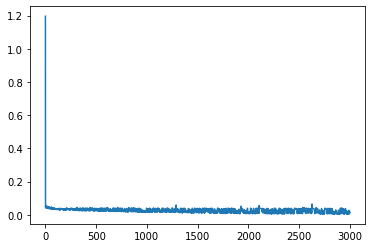

In [48]:
plt.plot(history.history["loss"])
plt.show()

In [49]:
preds = model.predict(x_test)

In [50]:
preds.shape

(1000, 1)

In [51]:
preds = preds.flatten()

In [52]:
pump_failure_in_future_window = 0
correctly_predicted_pump_failures = 0
correctly_predicted = 0
nr_test_samples = preds.shape[0]

tp = 0
tn = 0
fp = 0
fn = 0

for test_nr in range(0,nr_test_samples):
    ground_truth_output = y_test[test_nr]
    if preds[test_nr] < 0.5:
        predicted_output = 0.0
    else:
        predicted_output = 1.0
    print("Test example #{0}: ground truth vs. predicted machine status: {1} vs. {2}"
          .format(test_nr, ground_truth_output, predicted_output ))
    
    if predicted_output == ground_truth_output:
        correctly_predicted +=1
        
    if ground_truth_output==1:
        pump_failure_in_future_window += 1
        if predicted_output == ground_truth_output:
            correctly_predicted_pump_failures +=1
            
    if ground_truth_output==1:
        if predicted_output == ground_truth_output:
            # True positive:
            # There was a pump failure
            # and the MLP predictor predicted it
            tp+=1
        else:
            # False negative:
            # There was a pump failure
            # BUT the MLP predictor predicted it not
            fn+=1
            
    if ground_truth_output==0:        
        if predicted_output == ground_truth_output:
            # True negative:
            # There was no pump failure
            # and the MLP predictor predicted no pump failure
            tn+=1
        else:
            # False positive:
            # There was no pump failure
            # BUT the MLP predictor predicted a pump failure
            fp+=1
            
        
correct_classification_percent = (correctly_predicted/nr_test_samples)*100.0
print("\nCorrectly predicted {0} of {1} test examples --> {2}%"
      .format(correctly_predicted, nr_test_samples, correct_classification_percent))

print("\nIf there was really a pump failure in the future window,\n"
      "the MLP could predict it in {0} of the {1} pump failure (in future window) example cases."
      .format(correctly_predicted_pump_failures, pump_failure_in_future_window))

print("True positive:", tp)
print("True negative:", tn)
print("False positive:", fp)
print("False negative:", fn)

Test example #0: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #1: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #2: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #3: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #4: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #5: ground truth vs. predicted machine status: 0.0 vs. 1.0
Test example #6: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #7: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #8: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #9: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #10: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #11: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #12: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #13: ground truth vs. predicted machine status: 

In [53]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
#print("Precision: {0:.2f}".format(precision))
#print("Recall   : {0:.2f}".format(recall))

In [54]:
print("The machine status can be predicted with an accuracy of {0}%".format(correct_classification_percent)) 

The machine status can be predicted with an accuracy of 92.60000000000001%
